In [3]:
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from stop_dependence import depth_accuracy_dependence, samples_split_accuracy_dependence, \
impurity_decrease_accuracy_dependence

In [4]:
data = pd.read_csv('datasets/lenses.data', header=None, sep='\s+')
del data[0]
y = data[5]
X = data.loc[:, 1:4]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random.randint(0, 1000))

In [5]:
m_clf = DecisionTreeClassifier(max_depth=4, min_samples_split=0.2)
m_clf.fit(X_train, y_train)
print('train score: {}'.format(m_clf.score(X_train, y_train)))
print('test score: {}'.format(m_clf.score(X_test, y_test)))
print('Класс линз: {}'.format(m_clf.predict([[2, 1, 2, 1]])))

train score: 0.8888888888888888
test score: 0.8333333333333334
Класс линз: [3]


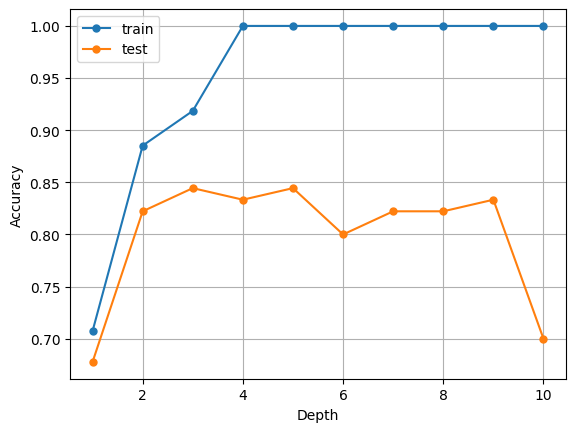

In [6]:
# Останов по высоте best_depth=2, acc=0.8; 4 - 0.86
plt.xlabel('Depth')
plt.ylabel('Accuracy')
depth_train_dep, depth_test_dep = depth_accuracy_dependence(X, y)
plt.plot(depth_train_dep, label='train',
marker='.', markersize=10)
plt.plot(depth_test_dep, label='test',
marker='.', markersize=10)
plt.legend()
plt.grid()
plt.show()

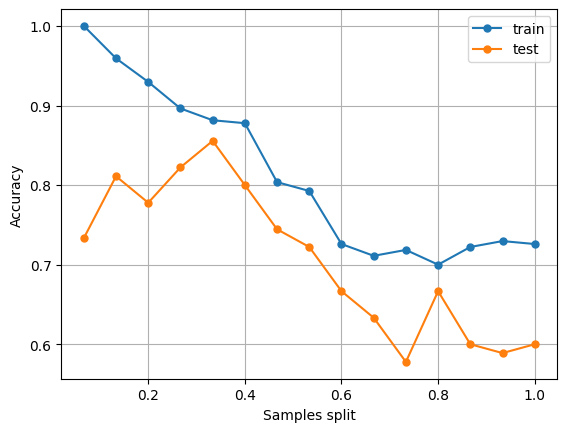

In [7]:
# Останов по числу объектов best=0.26, acc=0.85
plt.xlabel('Samples split')
plt.ylabel('Accuracy')
samples_split_train_dep, samples_split_test_dep = samples_split_accuracy_dependence(X, y)
plt.plot(samples_split_train_dep, label='train',
marker='.', markersize=10)
plt.plot(samples_split_test_dep, label='test',
marker='.', markersize=10)
plt.legend()
plt.grid()
plt.show()

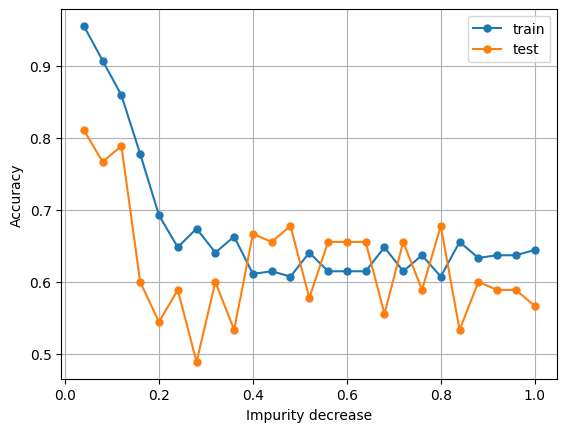

In [8]:
# Останов по проценту примеси(по ошибке классификации)
plt.xlabel('Impurity decrease')
plt.ylabel('Accuracy')
impurity_decrease_train_dep, impurity_decrease_test_dep = impurity_decrease_accuracy_dependence(X, y)
plt.plot(impurity_decrease_train_dep, label='train',
marker='.', markersize=10)
plt.plot(impurity_decrease_test_dep, label='test',
marker='.', markersize=10)
plt.legend()
plt.grid()
plt.show()

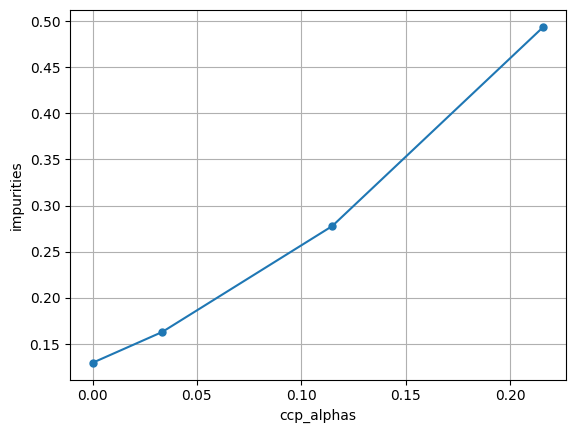

In [9]:
# alphas
plt.xlabel('ccp_alphas')
plt.ylabel('impurities')
ccpp = m_clf.cost_complexity_pruning_path(X_train, y_train)
plt.plot(ccpp['ccp_alphas'], ccpp['impurities'], label='test',
marker='.', markersize=10)
plt.grid()
plt.show()

In [10]:
# dependence depth on alphas
# Число испытаний для одного значения
test_count = 10
depth_dep_train = Series(index=ccpp['ccp_alphas'], dtype=float)
for alpha in ccpp['ccp_alphas']:
    mean_depth_train = 0.
    for _ in np.arange(test_count):
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random.randint(0, 1000))
        clf = DecisionTreeClassifier(ccp_alpha=alpha)
        clf.fit(X_train, y_train)
        mean_depth_train += clf.get_depth() / test_count
    depth_dep_train[alpha] = int(mean_depth_train)

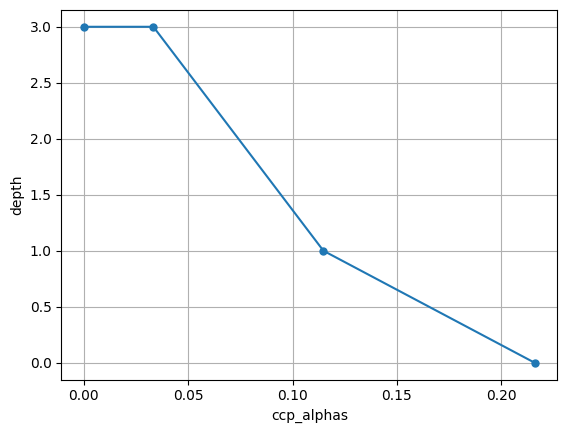

In [11]:
# Визуализация
plt.xlabel('ccp_alphas')
plt.ylabel('depth')
plt.plot(depth_dep_train, label='train', marker='.', markersize=10)
# plt.legend()
plt.grid()
plt.show()

In [26]:
# dependence accuracy on alphas
accuracy_dep_train = Series(index=ccpp['ccp_alphas'], dtype=float)
accuracy_dep_test = Series(index=ccpp['ccp_alphas'], dtype=float)
for alpha in ccpp['ccp_alphas']:
    mean_accuracy_train = 0.
    mean_accuracy_test = 0.
    for _ in np.arange(test_count):
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random.randint(0, 1000))
        clf = DecisionTreeClassifier(ccp_alpha=alpha)
        clf.fit(X_train, y_train)
        mean_accuracy_train += clf.score(X_train, y_train) / test_count
        mean_accuracy_test += clf.score(X_test, y_test) / test_count
    accuracy_dep_train[alpha] = mean_accuracy_train
    accuracy_dep_test[alpha] = mean_accuracy_test

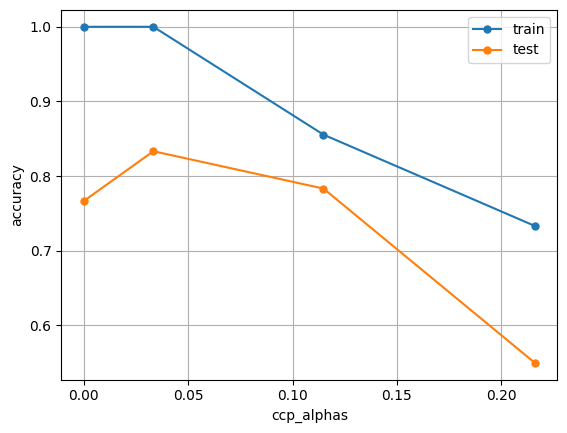

In [27]:
# Визуализация
plt.xlabel('ccp_alphas')
plt.ylabel('accuracy')
plt.plot(accuracy_dep_train, label='train', marker='.', markersize=10)
plt.plot(accuracy_dep_test, label='test', marker='.', markersize=10)
plt.legend()
plt.grid()
plt.show()